# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [1]:
# Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns
import scipy.stats as stats
import globe
import re
from nltk.corpus import stopwords
import nltk

In [2]:
games = pd.read_csv('/Users/sergejvasiljev/Documents/DATASETS/video_games_sales.csv')
games = games[['Rank', 'Name', 'Genre', 'Platform', 'Critic_Score']]

In [3]:
sport = games[games['Genre']=='Sports'].dropna(subset=['Critic_Score'])
sport

,Rank,Name,Genre,Platform,Critic_Score
0,1,Wii Sports,Sports,Wii,7.7
4,5,Wii Sports Resort,Sports,Wii,8.0
16,17,Wii Fit,Sports,Wii,7.9
17,18,Wii Fit Plus,Sports,Wii,8.0
68,69,FIFA 18,Sports,PS4,8.3
...,...,...,...,...,...
50561,50562,Vancouver 2010 - The Official Video Game of th...,Sports,PC,5.0
50730,50731,Virtua Tennis,Sports,DC,9.2
50731,50732,Virtua Tennis,Sports,NGage,3.6
50840,50841,VT Tennis,Sports,DSiW,4.0


### Средняя оценка спортивных игр критиками выше 7.5 ?  
Н0: средняя оценка <= 7.5  
Н1: средняя оценка > 7.5

In [4]:
#сравниваем с константой, по этому берем односторонний тест
alpha = 0.05
result = stats.ttest_1samp(sport['Critic_Score'], 7.5, alternative = 'greater')
print(sport['Critic_Score'].mean())
print( result)

if (result.pvalue/2) < alpha:
    print('Отвергаем 0 гипотезу, средняя оценка выше 7.5')
else:
    print('Не отвергаем 0 теорию, средняя оценка ниже 7.5')

7.291424418604655
Ttest_1sampResult(statistic=-3.719660933773832, pvalue=0.9998921110547919)
Не отвергаем 0 теорию, средняя оценка ниже 7.5


<AxesSubplot:xlabel='Critic_Score', ylabel='Count'>

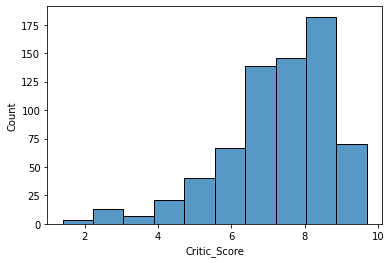

In [5]:
sns.histplot(data=sport['Critic_Score'], bins = 10)

**Наше предполодение, что средняя оценка критиков по спортивным играм находится выше 7.5 не нашло статистического подтверждения**

### Критикам одинаково нравятся игры и на pc и на рс4  
H0: средняя удовлетворенность критиков играми на рс и рс4 одинаковая  
H1: средняя удовлетворенность критиков играми на рс и рс4 различается

In [6]:
pc = games[games['Platform']=='PC'].dropna(subset=['Critic_Score'])
ps4 = games[games['Platform']=='PS4'].dropna(subset=['Critic_Score'])

In [7]:
t, p = stats.ttest_ind(pc['Critic_Score'], ps4['Critic_Score'], equal_var=False)
print('pc mean=', pc['Critic_Score'].mean())
print('ps4 mean=', ps4['Critic_Score'].mean())
print('t=', t)
print('p=', p)

if p < alpha:
    print('Отвергаем 0 гипотезу, средняя удовлетворенность различается')
else:
    print('Не отвергаем 0 теорию, средняя удовлетворенность не отличается')

pc mean= 7.541849710982658
ps4 mean= 7.904587155963299
t= -2.7394476056351627
p= 0.006931808250254211
Отвергаем 0 гипотезу, средняя удовлетворенность различается


<AxesSubplot:xlabel='Critic_Score', ylabel='Count'>

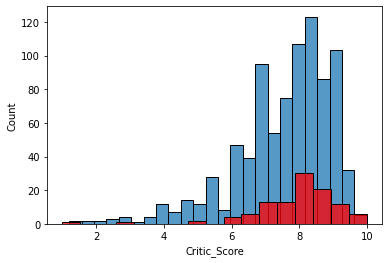

In [8]:
sns.histplot(data=pc['Critic_Score'] )
sns.histplot(data=ps4['Critic_Score'], color= 'red')

<AxesSubplot:xlabel='Critic_Score'>

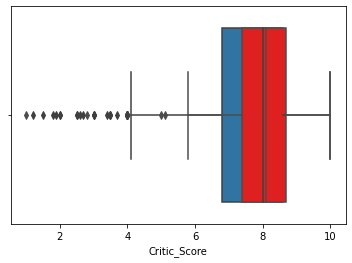

In [9]:
sns.boxplot(data=pc, x='Critic_Score')
sns.boxplot(data=ps4, x='Critic_Score', color='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb8182ea00>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb81810100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb8182e6a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7feb818107c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb81810b20>,
 'means': []}

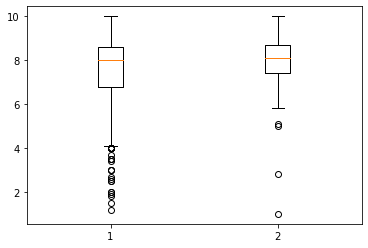

In [10]:
plt.boxplot([pc['Critic_Score'], ps4['Critic_Score']])

**Визуально, средние значения выборок очень похожи, но различие между ним статистически значимо**

### Критикам больше нравятся стрелялки или стратегии?

Н0: шутеры и стратеги нравятся одинаково  
Н1: есть ращличия в оценках шутеров и стратегий

In [11]:
shooter = games[games['Genre']=='Shooter'].dropna(subset=['Critic_Score'])
strategy = games[games['Genre']=='Strategy'].dropna(subset=['Critic_Score'])

In [12]:
t, p = stats.ttest_ind(shooter['Critic_Score'], strategy['Critic_Score'], equal_var=False)
print('Shooter mean=', shooter['Critic_Score'].mean())
print('Strategy mean=', strategy['Critic_Score'].mean())
print('t=', t)
print('p=', p)

if p < alpha:
    print('Отвергаем 0 гипотезу, средние оценки отличаются')
else:
    print('Не отвергаем 0 теорию, средние оценки не отличаются')

Shooter mean= 7.2868327402135264
Strategy mean= 7.429268292682925
t= -1.6073949711166526
p= 0.10838786414223071
Не отвергаем 0 теорию, средние оценки не отличаются


<AxesSubplot:xlabel='Critic_Score', ylabel='Count'>

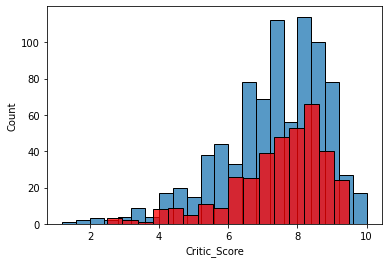

In [13]:
sns.histplot(data=shooter['Critic_Score'] )
sns.histplot(data=strategy['Critic_Score'], color= 'red')

**Различие оценок между шутерами и стратегиями статистически не значимо**

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [14]:
spam_data = pd.read_csv('/Users/sergejvasiljev/Documents/нетология/Python/Home_Task/pyda_homeworks/stat_case_study/spam.csv')
spam_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
# переводим в нижний регистр
spam_data['Message'] = spam_data['Message'].str.lower()

In [16]:
spam_data.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [17]:
# убираем спец символы
spam_data['Message'] = spam_data['Message'].str.replace(r'[\W_]+', ' ')

In [18]:
spam_data

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [19]:
# убираем мусорные слова
stopwords_set = set(stopwords.words('english'))
spam_data['Message_wo_stopwords'] = spam_data['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_set)]))
spam_data

,Category,Message,Message_wo_stopwords
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though
...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,will ü b going to esplanade fr home,ü b going esplanade fr home
5569,ham,pity was in mood for that so any other suggest...,pity mood suggestions
5570,ham,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...


In [20]:
# приводим к нормальной форме
from nltk.stem import WordNetLemmatizer

In [21]:
def lematizer(sentence):
    word_list = nltk.word_tokenize(sentence)
    wordnet_lemmatizer = WordNetLemmatizer()
    # Lemmatize list of words and join
    lemmatized_output = ' '.join([wordnet_lemmatizer.lemmatize(w) for w in word_list])
    return(lemmatized_output)

In [22]:
spam_data['text_lemmatized'] = spam_data.Message_wo_stopwords.apply(lematizer)
spam_data

,Category,Message,Message_wo_stopwords,text_lemmatized
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,nah think go usf life around though
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,will ü b going to esplanade fr home,ü b going esplanade fr home,ü b going esplanade fr home
5569,ham,pity was in mood for that so any other suggest...,pity mood suggestions,pity mood suggestion
5570,ham,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...,guy bitching acted like interested buying some...


In [23]:
# перевод в вектора TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam_data.text_lemmatized)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [24]:
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# строим логистическу регрессию
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam_data.Category, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = lr.predict(X_test)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1445    3]
 [  66  158]]


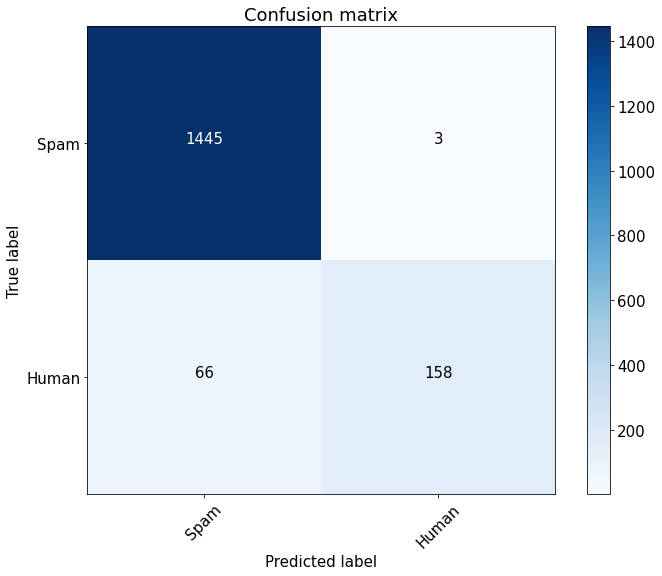

In [29]:
# рисуем confusion matrix
import itertools

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Spam', 'Human'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [30]:
# считаем метрики
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('accuracy', accuracy_score(y_test, y_pred).round(2))
print('f1_score', f1_score(y_test, y_pred, average="macro").round(2))
print('precision', precision_score(y_test, y_pred, average="macro").round(2))
print('recall', recall_score(y_test, y_pred, average="macro").round(2))

accuracy 0.96
f1_score 0.9
precision 0.97
recall 0.85


Достаточно высокая точность (96%)  
Высокий precision говорит о том, что мы 96% сообщений, которые мы определили как спам, действительно спам  
Recall говорит о том, что мы нашли лишь 85% из всех сообщений со спамом

In [31]:
# выводим то, что не сошлось
df_pred = X_test
df_pred.loc[:,'pred'] = y_pred
df_fact = spam_data[['Category', 'Message']]
df_result = df_pred.join(df_fact).loc[:,['pred', 'Category', 'Message']].rename(columns={'Category': 'fact'})

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
df_result[df_result.pred != df_result.fact]

,pred,fact,Message
2952,spam,ham,hey now am free you can call me
881,ham,spam,reminder you have not downloaded the content y...
1961,ham,spam,guess what somebody you know secretly fancies ...
3864,ham,spam,oh my god i ve found your number again i m so ...
2575,ham,spam,your next amazing xxx picsfree1 video will be ...
...,...,...,...
4543,ham,spam,freemsg hi baby wow just got a new cam moby wa...
752,ham,spam,you have an important customer service announc...
309,ham,spam,themob check out our newest selection of conte...
495,spam,ham,are you free now can i call now
